#Análise Exploratória dos Dados das Cotações dos Ativos

#Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import datetime as dt

#Funções Auxiliares

In [63]:
def getQuarterRange(start, end):
  firstQ = getQuarter(start)
  lastQ = getQuarter(end)
  res = []
  for y in range(getYear(start), getYear(end)+1):
    for q in range(1, 5):
      quarter = str(q)+"T"+str(y)
      if compareQuarters(quarter, firstQ) >= 0 and compareQuarters(quarter, lastQ) <= 0:
        res.append(quarter)
  return res


In [64]:
def compareQuarters(q1, q2):
  firstQ = q1.split("T")
  lastQ = q2.split("T")
  return 4*(int(firstQ[1]) - int(lastQ[1])) + (int(firstQ[0]) - int(lastQ[0]))

In [65]:
#data -> trimestre ----- Ex.: getQuarter("2020-03-02") -> "1T2020"
def getQuarter(date):
  d = date.split("-") #d[0] == year; d[1] == month; d[2] == day
  if int(d[1]) <= 3:
    q = "1"
  elif int(d[1]) <= 6:
    q = "2"
  elif int(d[1]) <= 9:
    q = "3"
  else:
    q = "4"
  return q + "T" + d[0]


In [37]:
def getYear(date):
  return int(date[0:4])

#Busca de dados

In [2]:
#tickers das ações negociadas na B3
tickers = ["PATI3","PATI4","BAHI3","BBDC3","BBDC4","BAZA3","BBAS3","BGIP3","BGIP4","BEES3","BEES4","BPAR3","BRSR3","BRSR6","BRSR5","BNBR3","BMIN3","BMIN4","BMEB3","BMEB4","CNPR3","BRIV3","BRIV4","BDLL3","BDLL4","BALM3","BALM4","BAUH3","BAUH4","BMFK3","BMKS3","CAMB4","CAMB3","RANI3","RANI4","ELET3","ELET6","ELET5","CMIG3","CMIG4","CLSC3","CLSC4","CESP3","CESP5","CESP6","CBEE3","FESA3","FESA4","CEDO3","CEDO4","CSAB3","CSAB4","CTNM3","CTNM4","REDE3","eeel3","eeel4","HBTS5","SC303","SCL04","CNOR4","NPR1","CRIV3","CRIV4","GGBR3","GGBR4","4030","CTSA3","CTKA3","CTKA4","VALE3","ELEK3","ELEK4","CGRA4","GUAR3","GUAR4","468-5","CNPB7","CNPD3","CNPF8","CNPA9","CNPE1","CNPC5","BRGE3","BRGE6","BRGE8","BRGE12","BRGE5","BRGE11","BRGE7","CALI3","CAL4","LIXC3","LIXC4","MEND3","MEND6","MEND5","BRKM3","BRKM5","BRKM6","CORR3","CORR4","DOHL3","DOHL4","RADL3","MNDL3","EALT4","EALT3","WEGE3","ETER3","EUCA3","EUCA4","SJOS","FBMC3","FBMC4","FIGE3","FIGE4","FNCN3","FJTA3","FJTA4","TASA3","TASA4","FRAS3","TUPY3","VVAR3","VVAR4","HETA3","HETA4","HOOT4","IGBR3","ROMI3","TRXR3","TXRX4","INEP3","ITSA3","ITSA4","JFEN3","KEPL3","LAME3","LAME4","LHER3","LHER4","LREN3","8192","MGEL3","MGEL4","ESTR4","POMO3","POMO4","MERC3","MERC4","LEVE3","MITG03","MITG04","GOAU3","GOAU4","MLFT3","MLFT4","JPSA3","MTSA3","MTSA4","MMAQ3","MMAQ4","MOAR3","NAFG3","NAFG4","NEMO3","NEMO5","NEMO6","1","PNVL3","PNVL4","PMAM3","AHEB3","AHEB5","AHEB6","PETR3","PETR4","PTNT3","PTNT4","1212","CNOR1","CNPB2","CNPA4","RPAD3","RPAD6","RPAD5","9989","RPMG3","ALPA3","ALPA4","SLED3","SLED4","SEIVA","SOND3","SOND6","SOND5","SPRI3","SPRI5","SPRI6","WLMM3","WLMM4","TCNO3","TCNO4","11215","TEKA3","TEKA4","TKNO3","TKNO4","TELB3","TELB4","CRPG3","CRPG6","CRPG5","UNIP3","UNIP6","UNIP5","VULC3","MYPK3","AZEV4","AZEV3","MWET3","MWET4","BOBR3","BOBR4","JBDU3","ITEC3","RCSL3","RCSL4","KLBN11","SNSY5","SNSY6","SNSY3","FIBR3","APTI3","APTI4","JOPA","JOPA3","JOPA4","RSUL3","RSUL4","PPAR3","13471","BOLSA","MNPR3","PTBL3","SCAR3","713854","SUZB3","RAPT3","RAPT4","TOYB3","TOYB4","ELPL3","BSLI03","BSLI04","CPLE3","CPLE6","CPLE4","CPLE5","USIM3","USIM6","USIM5","WHRL3","WHRL4","CEPE3","CEPE5","CEPE6","SBSP3","CEBR3","CEBR5","CEBR6","CYRE3","CEEB3","CEEB5","CEEB6","ENMT3","ENMT4","SHUL3","SHUL4","HGTX3","CMFA3","CMFA4","PCAR3","PCAR4","COCE3","COCE5","00000","LOAR11","007424","ENGI3","ENGI4","ENGI11","VSPT3","VSPT4","ATOM3","1545-8","NEOE","NEOE3","CGAS3","CGAS5","LIPR3","GAFS3","ETRO3B","QVQP3B","BRFS3","RSID3","OPTS3B","ECPR3","ECPR4","BNPA3B","OPSE3B","ENMA3B","CEGR3","UPKP3B","GPCP3","GPCP4","PSSA3","ALEF3B","CASN3","CASN4","OPHE3B","EMAE4","EGIE3","OPRE3B","ESVUFR","FTRT3B","TLVT3B","SPRT3B","RAIL3","EKTR3","EKTR4","CPTP3B","NEWT3B","SLCTB3","TIMP3","VIVT4","VIVT3","BETP3B","STBP3","MMXM3","BFRE3","BFRE12","BFRE11","MRSA3","MRSA5","MRSA6","OPGM3B","KROT3","COGN3","CSRN3","CSRN6","CSRN5","CELP3","CELP7","CELP5","CELP6","PRPT3B","GEPA3","GEPA4","TRPL3","TRPL4","IDNT3","PDTC3","UGPA3","00","DTCY3","DTCY","SAPR4","SAPR3","SAPR11","CPFE3","PEAB3","PEAB4","BRAP3","BRAP4","IVPR3","IVPR4","CCRO3","TIET11","LIQO3","ATMP3","PRMN3B","BIOM3","AELP3","TPIS3","ITUB3","ITUB4","CSMG3","ECOR3","NATU3","GOLL4","GRND3","DASA3","FRTA3","RENT3","ENBR3","CSAN3","LIGT3","BRML3","BR3","TOTS3","EQTL3","VLID3","AGRO3","CARD3","LUPA3","EMBR3","ODPV3","CREM3","OGXP3","CCXC3","TAEE3","TAEE4","TAEE11","MDIA3","PFRM3","TESA3","POSI3","LPSB3","TCSA3","RDNI3","PDGR3","IGTA3","SMTO3","EVEN3","SANB11","CPRE3","PINE4","JBSS3","JHSF3","FRIO3","FHER3","CRDE3","ceed3","ceed4","INPR3","VIVR3","LOGN3","SLCE3","EZTC3","MRFG3","ADR","tgma3","MAGG3","HBOR3","IDVL3","IDVL4","MRVE3","BEEF3","ABCB4","SGPS3","MULT3","BTOW3","GSHP3","ESTC3","YDUQ3","CCPR3","MDNE3","DTEX3","21130","TEND3","BBRK3","BPAN4","ENEV3","ALSC3","NUTR3","OSXB3","DIRR3","GPAR3","HYPE3","LLIS3","PRML3","ALUP11","BVMF3","B3SA3","RNEW11","TRPN3","021725","CIEL3","FLRY3","MPLU3","MILS3","JSLG3","JSLG11","022055","AFLT3","PRIO3","BRIN3","APER3","ARZZ3","SSBR3","ALSO3","QGEP3","ENAT3","SHOW3","MGLU3","QUAL3","BPHA3","TECN3","SEDU3","STKF3","HBSA3","LCAM3","UCAS3","SNSL3","SQIA3","BSEV3","22853","LINX3","BBSE3","023175","SEER3","ANIM3","ABEV3","LOGG3","QUSW3","CVCB3","OMGE3","RLOG3","DMMO","OFSA3","23574","MEAL3","WIZS3","YOUC3","MSRO3","MOVI3","CTCA3","AALR3","PARD3","AZUL4","PACF3","CRFB3","IRBR3","24201A","CAML3","PRNR3","SMLS3","SMFT","SMFT3","INNT3","BRDT3","BKBR3","FLEX","GNDI3","HAPV3","BIDI4","BIDI3","BIDI11","PTCA3","PTCA4","PTCA11","BMGB4","CNTO3","LTLA","NTCO3","VIVA3","CEAB3","MTRE3","LWSA3","AMBP3","SIMH3","LJQQ3","DMVF3","LAVV3","PLPL3","PETZ3","CURY3","MELK3","CASH3","AERI3"]
errors = []
prices = dict()

In [ ]:
i = 1
for t in tickers:
  print(str(i) + ". Buscando preços de " + t + " ---- faltam " + str(len(tickers)-i))
  i+=1
  try:
    prices[t] = web.get_data_yahoo(t+".SA", "2010-01-01", dt.date.today())
  except:
    print("------- 404 -> Not found")
    errors += [t]

dict_keys(['PATI3', 'PATI4', 'BAHI3', 'BBDC3', 'BBDC4', 'BAZA3', 'BBAS3', 'BGIP3', 'BGIP4', 'BEES3', 'BEES4', 'BRSR3', 'BRSR6', 'BRSR5', 'BNBR3', 'BMIN3', 'BMIN4', 'BMEB3', 'BMEB4', 'BRIV3', 'BRIV4', 'BDLL3', 'BDLL4', 'BALM3', 'BALM4', 'BAUH3', 'BAUH4', 'BMKS3', 'CAMB4', 'CAMB3', 'RANI3', 'RANI4', 'ELET3', 'ELET6', 'ELET5', 'CMIG3', 'CMIG4', 'CLSC3', 'CLSC4', 'CESP3', 'CESP5', 'CESP6', 'CBEE3', 'FESA3', 'FESA4', 'CEDO3', 'CEDO4', 'CSAB3', 'CSAB4', 'CTNM3', 'CTNM4', 'REDE3', 'eeel3', 'eeel4', 'HBTS5', 'CRIV3', 'CRIV4', 'GGBR3', 'GGBR4', 'CTSA3', 'CTKA3', 'CTKA4', 'VALE3', 'CGRA4', 'GUAR3', 'BRGE3', 'BRGE6', 'BRGE8', 'BRGE12', 'BRGE5', 'BRGE11', 'CALI3', 'MEND3', 'MEND6', 'BRKM3', 'BRKM5', 'BRKM6', 'CORR3', 'CORR4', 'DOHL3', 'DOHL4', 'RADL3', 'MNDL3', 'EALT4', 'EALT3', 'WEGE3', 'ETER3', 'EUCA3', 'EUCA4', 'FBMC3', 'FIGE3', 'FIGE4', 'TASA3', 'TASA4', 'FRAS3', 'TUPY3', 'VVAR3', 'VVAR4', 'HETA4', 'HOOT4', 'IGBR3', 'ROMI3', 'TXRX4', 'INEP3', 'ITSA3', 'ITSA4', 'JFEN3', 'KEPL3', 'LAME3', 'LAME4

#Verificação da quantidade de cotações diárias nulas 

In [39]:
count_zeros = [0 for i in range(45)]
count_not_zeros = [0 for i in range(45)]

time = [i for i in range(2010, 2021)]

for d in prices["PETR4"].index:
  for ticker in prices:
    if str(d) in prices[ticker].index and prices[ticker]["Volume"].loc[str(d)] > 0:
      count_not_zeros[getYear(str(d))-2010] += 1
    else:
      count_zeros[getYear(str(d))-2010] += 1

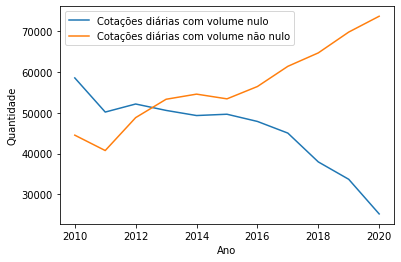

In [45]:

plt.plot(time, count_zeros, label = "Cotações diárias com volume nulo")
plt.plot(time, count_not_zeros, label = "Cotações diárias com volume não nulo")
plt.legend()
plt.xlabel("Ano")
plt.ylabel("Quantidade")

plt.show()

Text(0.5, 1.0, 'Porcentagem de cotações diárias líquidas')

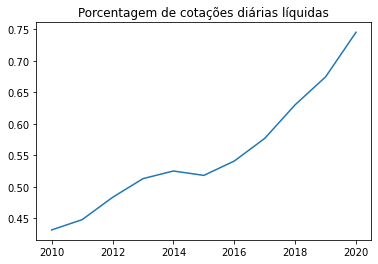

In [48]:
porcentagem_liquidez = [count_not_zeros[i]/(count_not_zeros[i]+count_zeros[i]) for i in range(len(count_not_zeros))]
plt.plot(time, porcentagem_liquidez)
plt.title("Porcentagem de cotações diárias líquidas")

##Quantidade de empresas com liquidez em 80% dos pregões por ano

In [49]:
empresas_liquidas = {ticker:[0 for i in range(2010, 2021)] for ticker in prices.keys()}
for ticker in prices.keys():
  for i in prices[ticker].index:
    empresas_liquidas[ticker]
